## Setup

In [1]:
import numpy as np
import keras
from keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 8s 6ms/step - loss: 0.3716 - accuracy: 0.8850 - val_loss: 0.0852 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1125 - accuracy: 0.9652 - val_loss: 0.0629 - val_accuracy: 0.9830
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0868 - accuracy: 0.9733 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 3s 6ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.0476 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0620 - accuracy: 0.9805 - val_loss: 0.0385 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0348 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0346 - val_accuracy: 0.9892
Epoch 

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02406519092619419
Test accuracy: 0.9919000267982483


# Change Optimizer

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 45s 104ms/step - loss: 2.2979 - accuracy: 0.1281 - val_loss: 2.2621 - val_accuracy: 0.2585
Epoch 2/15
422/422 [==============================] - 44s 103ms/step - loss: 2.2383 - accuracy: 0.2259 - val_loss: 2.1943 - val_accuracy: 0.4395
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 2.1611 - accuracy: 0.3295 - val_loss: 2.0865 - val_accuracy: 0.6010
Epoch 4/15
422/422 [==============================] - 43s 102ms/step - loss: 2.0306 - accuracy: 0.4289 - val_loss: 1.8877 - val_accuracy: 0.7065
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 1.7992 - accuracy: 0.5086 - val_loss: 1.5469 - val_accuracy: 0.7557
Epoch 6/15
422/422 [==============================] - 43s 103ms/step - loss: 1.4891 - accuracy: 0.5747 - val_loss: 1.1519 - val_accuracy: 0.8060
Epoch 7/15
422/422 [==============================] - 42s 100ms/step - loss: 1.2157 - accuracy: 0.6294 - val_loss: 0.8649 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.38159316778182983
Test accuracy: 0.902400016784668


In [ ]:
batch_size = 128
epochs = 15

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 6ms/step - loss: 2.2827 - accuracy: 0.1411 - val_loss: 2.2409 - val_accuracy: 0.3253
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 2.2114 - accuracy: 0.2477 - val_loss: 2.1522 - val_accuracy: 0.5803
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 2.1051 - accuracy: 0.3644 - val_loss: 1.9958 - val_accuracy: 0.6752
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 1.9181 - accuracy: 0.4526 - val_loss: 1.7097 - val_accuracy: 0.7165
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 1.6322 - accuracy: 0.5275 - val_loss: 1.3187 - val_accuracy: 0.7680
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 1.3400 - accuracy: 0.5924 - val_loss: 0.9890 - val_accuracy: 0.8152
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 1.1333 - accuracy: 0.6440 - val_loss: 0.7831 - val_accuracy: 0.8395
Epoch 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3992418348789215
Test accuracy: 0.8942999839782715


In [13]:
batch_size = 128
epochs = 15

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/15
422/422 [==============================] - 3s 5ms/step - loss: 1.4412 - accuracy: 0.6151 - val_loss: 1.2996 - val_accuracy: 0.8180
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 1.4096 - accuracy: 0.6218 - val_loss: 1.2604 - val_accuracy: 0.8213
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 1.3772 - accuracy: 0.6240 - val_loss: 1.2209 - val_accuracy: 0.8227
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 1.3420 - accuracy: 0.6340 - val_loss: 1.1813 - val_accuracy: 0.8262
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 1.3125 - accuracy: 0.6393 - val_loss: 1.1428 - val_accuracy: 0.8278
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 1.2852 - accuracy: 0.6406 - val_loss: 1.1054 - val_accuracy: 0.8300
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 1.2551 - accuracy: 0.6463 - val_loss: 1.0691 - val_accuracy: 0.8323
Epoch 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8587691187858582
Test accuracy: 0.8295000195503235


313/313 [==============================] - 1s 2ms/step
Prediction for the first test sample: [0.01057383 0.00240098 0.01584349 0.03086559 0.02270436 0.01152244
 0.00527291 0.82800907 0.02398367 0.04882361]
Predicted classes for the first 10 test samples: [7 2 1 0 4 1 4 9 4 9]


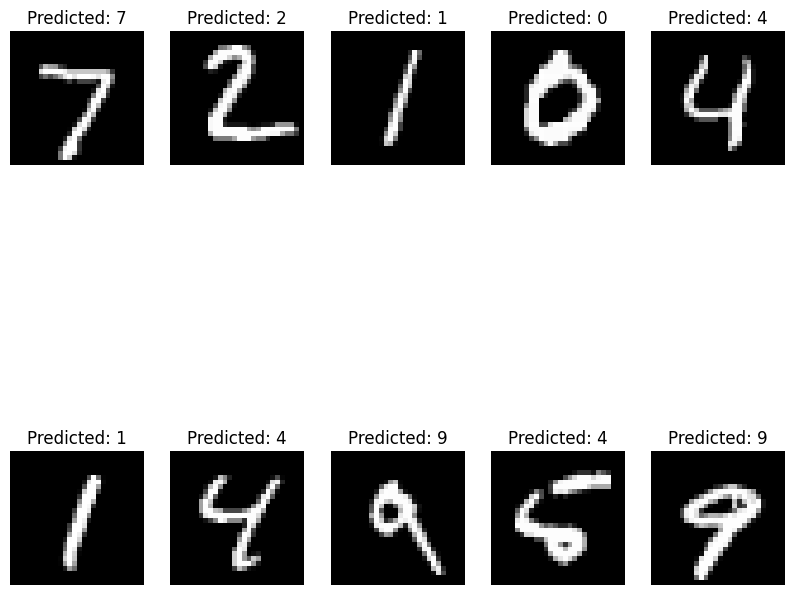

In [15]:
import matplotlib.pyplot as plt # plotting library

# Make predictions
predictions = model.predict(x_test)

# Print the first prediction
print("Prediction for the first test sample:", predictions[0])

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted classes for the first 10 test samples:", predicted_classes[:10])

# Display the corresponding images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
plt.show()


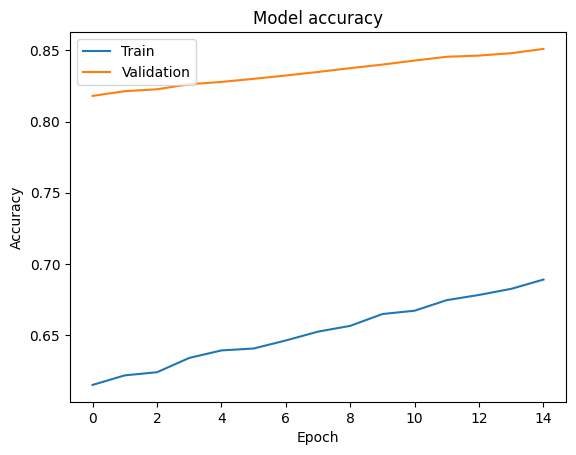

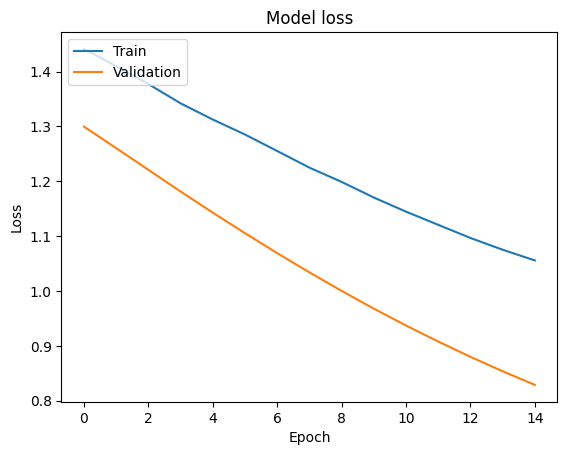

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
